In [1]:
import sys
sys.path.append('/Users/vdk/GeneveWork/Code/calibpipe-main-calibpipe/')
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib
import csv
import scipy
import matplotlib.pyplot as plt
import random
import copy
from os import path, makedirs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from ctapipe.containers import MuonEfficiencyContainer
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.core import TelescopeComponent
from ctapipe.core.traits import (
    List,
    Int,
    FloatTelescopeParameter,
    TelescopeParameter,
    Unicode,
)
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.muon import MuonRingFitter, MuonIntensityFitter
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.calib import CameraCalibrator
from traitlets.config.loader import Config, FileConfigLoader, JSONFileConfigLoader
import pathlib
from calibpipe.throughput import MuonCalibrator
from traitlets.config import Config
from astropy.time import Time
from astropy.coordinates import EarthLocation,SkyCoord, AltAz 

In [2]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

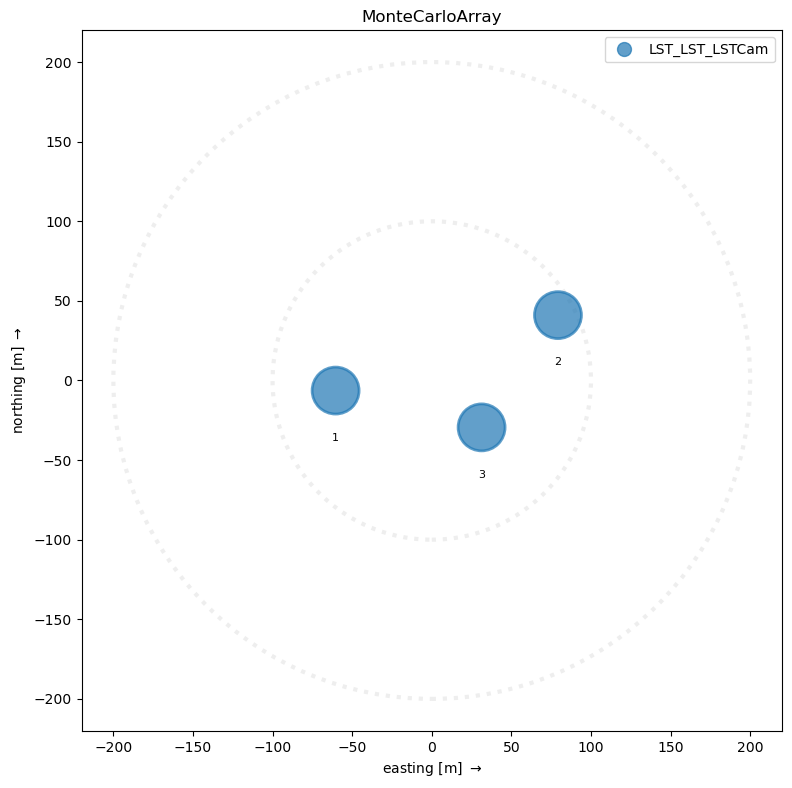

In [3]:
source.subarray.peek()

In [4]:
print(source.subarray.tel)

{1: TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'), 2: TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'), 3: TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam')}


In [ ]:
#filename = '/Users/vdk/MST_work/data_muons/mono_proton_simtel/proton_20deg_0deg_run2___cta-prod6-paranal-2147m-Paranal-nshow-3000-0-LSTs-1-MSTs-0-SSTs-NSCAT_5_CSCAT_300_EMIN_1_EMAX_200_after_muontag.simtel.zst'
#filename = '/Users/vdk/MST_work/data_muons/mono_muon_simtel/muon_20deg_0deg_run0___cta-prod6-paranal-2147m-Paranal-0-LSTs-1-MSTs-0-SSTs-NSCAT_1_CSCAT_8_EMIN_0.005_EMAX_1_FIXCHI_600_VIEWCONE_3_after_muontag.simtel.zst'
#filename = '/Users/vdk/sim_run_folder/test321.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)



for i,j in enumerate(event_iterator):
    if i == 1:
        telescope = 1
        event = j
        image_processor = ImageProcessor(source.subarray)
        muon_processor = MuonProcessor(source.subarray)
        calib = CameraCalibrator(
                image_extractor_type="GlobalPeakWindowSum",
                subarray = source.subarray)
        calib(j)
        image_processor(j)
        muon_processor(j)
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[telescope].camera.geometry
        title="TrueImage run {} if {} fit {} width {}".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        disp.image = j.simulation.tel[telescope].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        for pix_id in range(0,1764):
            bx.plot(j.r0.tel[telescope].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
        bx.set_ylabel("ADC counts")
        bx.set_xlabel("Samples")
        bx.set_title("Waveforms")
        plt.show()
        #plt.savefig(f"/Users/vdk/MST_ProtonImages_NewQualityCheck/TrueImage+Waveform_mstPROTON_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
        #plt.savefig(f"/Users/vdk/TrueImage+Waveform_mstMUON_event{j.index.event_id}_obs{j.index.obs_id}")
        break
        #if i == 150:
        #    break

plt.close()

In [7]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)
for i,j in enumerate(event_iterator):
    print(i, j.trigger.tels_with_trigger)
    

0 [3]
1 [1 3]
2 [2 3]
3 [1]
4 [2]
5 [2 3]
6 [2]
7 [1]
8 [1]
9 [2]
10 [2]
11 [1]
12 [3]
13 [1 2 3]
14 [1]
15 [1]
16 [2]
17 [2]
18 [1 2 3]
19 [1 2 3]
20 [1 2 3]
21 [2]
22 [1]
23 [1 2 3]
24 [3]
25 [1]
26 [1 2 3]
27 [2]
28 [1 2 3]
29 [1]
30 [1]
31 [1 2 3]
32 [1]
33 [3]
34 [1 3]
35 [3]
36 [1 2 3]
37 [1 2 3]
38 [2]
39 [1]
40 [2]
41 [1 2]
42 [1 3]
43 [1 3]
44 [1]
45 [1 2 3]
46 [1 2]
47 [1]
48 [1]
49 [2 3]
50 [2]
51 [3]
52 [2]
53 [1 2 3]
54 [1 2 3]
55 [1 3]
56 [1 2 3]
57 [1 3]
58 [1]
59 [3]
60 [3]
61 [2]
62 [2]
63 [1]
64 [1 2 3]
65 [1]
66 [1]
67 [1]
68 [2]
69 [1 2 3]
70 [1 2 3]
71 [2]
72 [2]
73 [2 3]
74 [1]
75 [1]
76 [1]
77 [1 2 3]
78 [2]
79 [1]
80 [3]
81 [1 3]
82 [1 2 3]
83 [1]
84 [3]
85 [2 3]
86 [2]
87 [1 2 3]
88 [3]
89 [2]
90 [1 2 3]
91 [1]
92 [1]
93 [1 2 3]
94 [1]
95 [2]
96 [1]
97 [2]
98 [2 3]
99 [1]
100 [2]
101 [1 2 3]
102 [1 3]
103 [2 3]
104 [1]
105 [1]
106 [2]
107 [2 3]
108 [1 2 3]
109 [1 2 3]
110 [1 3]
111 [2 3]
112 [2 3]
113 [1]
114 [1]
115 [2]
116 [2]
117 [2]
118 [1 2]
119 [1]
120 [3

In [ ]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

In [ ]:
event = next(event_iterator)

In [ ]:
for i in range(len(event.trigger.tels_with_trigger)):
    print(event.trigger.tels_with_trigger[i])




In [ ]:
camgeom = source.subarray.tel[1].camera.geometry

In [ ]:
disp = CameraDisplay(camgeom)
disp.image = next(event_iterator).simulation.tel[3].true_image

In [ ]:
event = next(event_iterator)

In [ ]:
print(len(event.simulation.tel[10].true_image))

In [ ]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

events = [copy.deepcopy(event) for event in source]


for i,j in enumerate(event_iterator):
    print(f"Telescope with data: {event.r1.tel.keys()} in the events number {i}")

In [ ]:
obstime = Time("2013-11-01T03:00")
location = EarthLocation.of_site("Roque de los Muchachos")

altaz = AltAz(location=location, obstime=obstime)

array_pointing = SkyCoord(
    alt=event.pointing.array_azimuth,
    az=event.pointing.array_altitude,
    frame=altaz,
)

print(array_pointing)

In [ ]:
filename = '/Users/vdk/sim_run_folder/corsika_theta_28.4_az_182.75_run2.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

events = [copy.deepcopy(event) for event in source]
events[4]

In [ ]:
events[12].trigger.tel[3]

In [ ]:
stereo_mask = []
for i in events:
    check_LST1 = 1 in i.trigger.tels_with_trigger
    check_LST2 = 2 in i.trigger.tels_with_trigger
    if check_LST1 and check_LST2:
        stereo_mask.append(True)
        print(True)
    else:
        stereo_mask.append(False)        
        print(False)

In [ ]:
stereo_events = []
for i,j in enumerate(events):
    if stereo_mask[i]:
        stereo_events.append(j)
        print(j.trigger.tels_with_trigger)


In [ ]:
#for i in stereo_events:
    #print(i.trigger.tels_with_trigger)
len(stereo_events)

In [ ]:
source.subarray.peek()

In [ ]:
telescope = 1
camgeom = source.subarray.tel[telescope].camera.geometry
disp = CameraDisplay(camgeom)
disp.image = events[12].simulation.tel[telescope].true_image #.sum(axis=1)
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()

In [ ]:
telescope = 3
camgeom = source.subarray.tel[telescope].camera.geometry
disp = CameraDisplay(camgeom)
disp.image = events[6].simulation.tel[telescope].true_image #.sum(axis=1)
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()

In [ ]:
stereo_events[2].trigger.tels_with_trigger

In [ ]:
filename = '/Users/vdk/sim_run_folder/test123.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

for i,j in enumerate(event_iterator):
        telescope = 1
        event = j
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        disp.image = j.simulation.tel[telescope].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = bx)
        disp.image = j.simulation.tel[2].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        #bx.set_ylabel("ADC counts")
        #bx.set_xlabel("")
        bx.set_title("LST2")
        #plt.show()
        plt.savefig(f"/Users/vdk/StereoProton_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
        #plt.savefig(f"/Users/vdk/TrueImage+Waveform_mstMUON_event{j.index.event_id}_obs{j.index.obs_id}")
        #if i == 150:
        #    break

plt.close()

In [ ]:
# pipeline to extract only stereo trigger for 2 LSTs
filename = '/Users/vdk/sim_run_folder/run1_nt2_mt2_at1.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

events = [copy.deepcopy(event) for event in source]

stereo_mask = []
for i in events:
    check_LST1 = 1 in i.trigger.tels_with_trigger
    check_LST2 = 2 in i.trigger.tels_with_trigger
    if check_LST1 and check_LST2:
        stereo_mask.append(True)
        #print(True)
    else:
        stereo_mask.append(False)        
        #print(False)

stereo_events = []
for i,j in enumerate(events):
    if stereo_mask[i]:
        stereo_events.append(j)
        #print(j.trigger.tels_with_trigger)

print("events = ", len(events))
print("stereo events = ", len(stereo_events))
source.subarray.peek()

In [ ]:
for i,j in enumerate(stereo_events):
        telescope = 1
        event = j
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        disp.image = j.simulation.tel[telescope].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = bx)
        disp.image = j.simulation.tel[2].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        #bx.set_ylabel("ADC counts")
        #bx.set_xlabel("")
        bx.set_title("LST2")
        #plt.show()
        plt.savefig(f"/Users/vdk/StereoProtonNT2MT2_AT1_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
        #plt.savefig(f"/Users/vdk/TrueImage+Waveform_mstMUON_event{j.index.event_id}_obs{j.index.obs_id}")
        #if i == 150:
        #    break

plt.close()

In [ ]:
for i in stereo_events:
    print(i.trigger.tels_with_trigger)

In [ ]:
source.subarray.tels

In [ ]:
# pipeline to extract only stereo trigger for 2 LSTs
all_events = []
for i in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/numtele2_maxtele2_arraytelescope1/corsika_theta_28.4_az_182.75_run{i}.simtel.gz'
    source = EventSource(filename, max_events=10000)
    events = [copy.deepcopy(event) for event in source]
    all_events.append(events)

#stereo_mask = []
#for i in events:
#    check_LST1 = 1 in i.trigger.tels_with_trigger
#    check_LST2 = 2 in i.trigger.tels_with_trigger
#    if check_LST1 and check_LST2:
#        stereo_mask.append(True)
#        #print(True)
#    else:
#        stereo_mask.append(False)        
#        #print(False)

#stereo_events = []
#for i,j in enumerate(events):
#    if stereo_mask[i]:
#        stereo_events.append(j)
#        #print(j.trigger.tels_with_trigger)

#print("events = ", len(events))
#print("stereo events = ", len(stereo_events))
#source.subarray.peek()



In [ ]:
full_stereo_events = []
count = 0
for j in range(1,40):
    for i in all_events[j]:
        count += 1
        if len(i.trigger.tels_with_trigger) > 1:
            full_stereo_events.append(i)

In [ ]:
len(full_stereo_events)

In [ ]:
count

In [ ]:
2745/11191

In [32]:
checker = 0
efficiency_container = []
for k in range(1,40):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    for i,j in enumerate(event_iterator):
        checker += 1
        if len(j.trigger.tels_with_trigger) > 1:
            image_processor = ImageProcessor(source.subarray)
            muon_processor = MuonProcessor(source.subarray)
            calib = CameraCalibrator(
                image_extractor_type="GlobalPeakWindowSum",
                subarray = source.subarray)
            calib(j)
            image_processor(j)
            muon_processor(j)
            for m in j.muon.tel.keys():
                efficiency_container.append(j.muon.tel[m].efficiency)
            efficiency_container.append(j)
        
        
            
            
        

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2070.6077999043396
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1241.196385980594
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2613.0042172248104
Not converged
False
1213.407794494915
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1050.1688511425118


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
545.9955867049907
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
877.3812625370679


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
815.114534005833
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
902.3990588284305
Not converged
False
4278.950319542723
False
1037.1904457555152
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6269.6733537602595
True
868.5823971606782
Not converged
False
1934.8509005011535
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1770.0730732233183
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2122.8088136343326
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1397.7802939331143
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2499.9786100959227
False
1386.6826515822702


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1414.1635024498235
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
935.843228442365
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
516.1730317914365
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
998.6481521149517
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
333.2791400594685


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3732.1090325133528
Not converged
False
1180.445751061046
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5761.457804686588
True
902.3651452573885
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2013.0547492343262
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1992.3739047203926
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
689.2647786962727
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2282.2678287207677
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1682.5836875185687
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1782.9877538970306
False
1054.963008004792


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1020.9880318911181
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.n

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2640.4161492264725
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1088.9807879169011
Not converged
False
452.55512995735756
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1582.872290745643
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5701.684340385011
False
1091.899085469356
Not converged
False
1729.1163728108174


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
567.300244068312
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2809.6664875004785
False
2035.0042812180436
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1285.3638943121907
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
756.6883695507229
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
364.703923194961


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2005.7220680143814
Not converged
False
614.6932416927289
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1151.3233193140884
Not converged
False
516.1481230281196
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
28735.675810476067
Not converged
False
696.5730397839112
Not converged
False
89601.60137798714
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2975.6827360385732
Not converged
False
6100.751067063159
Not converged
False
2176.6762664390535


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
570.0648489552751
BROKEN 

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1575.9316570781464
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2728.82222781204
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
808.8667319860452
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2666.3920019704756
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1530.7314375591798
Not converged
False
569.053001979069
Not converged
False
905.4315457775904
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1612.973898900601
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1742.7367977249703
False
949.3036804481615
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1053.7235629622828
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1208.527900235958


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5341.539617708242
Not converged
False
1355.2268281376773
False
1738.592939602652
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
614.8611467251137
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2717.8335880265304
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2100.509328058073
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1368.8960223927938
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKE

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
768.4000002065064
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
635.6746372683937
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1172.9652683488914
Not converged
False
406.5394849199906
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
27873.3941608714
False
968.317260552217
Not converged
False
95959.42936459294
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2389.6216048187407
False
5341.470933195531
Not converged
False
2194.5269196968725


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
758.4818851767834
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1995.082527083853
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3919.6715567170695
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
812.0361787022522
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1852.9944363760962
Not converged
False
540.3179669235026
Not converged
True
798.5311667202944
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
882.6131360472414
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
874.4605480761894
Not converged
False
659.9159893524152
False
810.2140736864553
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
851.9148553120214
False
576.8882646874608
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2487.239717472129
False
453.86690204945216
False
595.9140546977413
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1010.7156752362004
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
795.678987719151


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
796.828732013726
False
817.3980467450017
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
700.8410684609966
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
429.5940473570506
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
918.2354594487298


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
904.8657977669977
False
768.5667646178377
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
809.2901916924089
Not converged
False
622.1336891528855
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2499.1340514324365
False
460.97574240972057
False
1372.1365734210417
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1028.5760352715547
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1098.1569163415063
True
758.8659811208996
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
544.8992226154302
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
477.4301260723781
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3467.161182530852
True
1432.564102877342
Not converged
False
8648.90485236158
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
799.3080861488237
Not converged
False
1418.3704088835964
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
959.1421551908802
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
481.71745362615803
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4157.519353671912
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4672.970129530967
Not converged
False
8632.464591947028


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
647.9145348156558
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1631.9459130648663
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
416.7720691934287
Not converged
True
1613.327688994828
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
676.6744028353352
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1029.94764216061
Not converged
False
914.2370306018462
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1598.0937547458063
Not converged
False
3197.852812105417
Not converged
False
1094.2208117904997
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
572.8175595319004
False
911.8145455080446
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
8070.261101815175
False
1892.6965735429085
False
4685.087104335068


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2798.2251008491617
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
533.9616493477995


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
3984.7497279157774
Not converged
True
1224.3274339522372
Not converged
False
9767.915702091688
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1144.849693397923
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
883.0691923529595
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.nd

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
869.2904659933251
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
463.5296113723927
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4204.800399829883
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
8640.82965342503
False
8779.021107649787
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
679.2194394084072
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1489.7714127594447
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKE

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
446.11365202806434
Not converged
True
1532.1176120318055
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1082.5606866470703
Not converged
False
901.1094786057955
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1655.4654704751877
Not converged
False
4386.387673941235
Not converged
False
1024.746011810808
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
909.4298421475003
Not converged
False
1168.1316075791199
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6944.385098544622
Not converged
True
2452.488271662651
Not converged
True
4890.3195289641235
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2769.3390440037556
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2757.020407528911


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2573.309514351577
True
1448.8956663890772
Not converged
False
1117.6829290923652
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
394.51297400908044
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
835.0801680353866
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4008.5429223736687
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKE

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1392.879336246831
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
596.2315281160222
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1688.1148420028076
False
502.11609188987165
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1352.8435889410064
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1421.198154550731


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2028.9089907744124
False
3874.3127846979723
False
2122.4839625622244
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1055.9526646760958
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
591.2655785201813
Not converged
False
1555.2917814744296
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1159.348025377722
False
1059.4096919122576
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2701.595598912258
False
2938.7028571855053


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1414.4652714984272
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
E VariableMetricBuilder Initial matrix not pos.def.
False
1379.414356602638
True
731.0021876080826
Not converged
True
679.2861381667906
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.n

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
573.3790471694404
Not converged
False
2006.687735170194
False
675.878438942412
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
495.4588589566783
Not converged
False
1928.7166183214
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
510.40076747034954
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
597.6841713338312
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
387.3042044722536
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2729.3999748667534
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2776.4538787515735
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1136.7213307277793
False
923.0709184900306
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
395.4722111754651
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3881.217546570194
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1454.819010440765
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
520.2784679577611


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1479.780903675874
False
712.5090492896524
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
591.1508535190102
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1438.0526462583566


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1395.0981588820518
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
534.0511309535016
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2354.6603970819233
False
3912.0284434405194
Not converged
False
2256.0686014440917
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1158.3763684122328


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
438.72138597979404
False
1445.5008817207452
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1238.0238742879978
False
1230.66509496413
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2705.2579767348175
False
2248.1409361842598


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1483.7823577971787
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2446.483304344486


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
491.3181365254642
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
655.5521147477378
False
1288.7092776200398
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
534.3364721372847
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
538.2241897692325
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1143.3752497065793
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
534.6582161930883
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1335.1286205118747
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
957.48051910936
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3929.0991574074937
Not converged
True
1563.5970628287678


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
531.0340746931923
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
437.1469772329875


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1210.9991644603242
False
1088.0140779063993
False
885.5851331449
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
813.6032461474413
False
3403.7760868347386
False
2554.71092504954


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1897.2823744339503
True
1506.9877439588302
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1202.6321805215543
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2259.08678542887
Not converged
False
2850.1823674644784
False
558.4045042482506
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1342.0352825935192
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2715.397022716786


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1476.5174056311907


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
9846.036546333438
Not converged
False
4164.890296060152
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1807.0611602629056
Not converged
False
9589.97627028933
False
7056.3834433210695
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1876.6248906597184
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
6728.747203772895


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1607.9474699645612
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
932.9638634679585
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
497.237406384329
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1219.3246580970135
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1300.786300669447
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3673.2826569006093
False
1042.3303379882168


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
502.8205627691463
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1332.5463580001726


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
995.2825193041217
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
684.1112710386284


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2922.2389889084943
False
2698.978705964708
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2476.566568682418
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1090.4747211959711
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2108.3358942367463
False
2688.011398180466
Not converged
False
1209.75114112754
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3336.54388995104
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2308.3569478132713


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2605.5874718426953
Not converged
False
9895.966047156946
Not converged
False
4096.906383094165
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2135.8164412761885
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
10915.236157650425
Not converged
False
7971.709016321143
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
6463.620874573786
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1223.9394847709887
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.nd

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1609.7296552082603
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
795.2965794901338
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
982.5843566205241


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
459.693275694865
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN P

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1024.9165235446478
True
760.5580721924873
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1074.8392525590007
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
956.8240962370273
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4102.424319856075
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2501.569150042579
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1637.2132369863734
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
6835.401811686488
Not converged
False
1859.626010161595
Not converged
False
5506.3623716856555
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
492.9968958491334
False
2081.0438948531933
Not converged
False
481.0198669177041


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
529.5632378258367
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
390.02340485548893
Not converged
False
993.720826018732
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
371.4373519124656


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1074.9340773443878
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1099.774745971865


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
381.3435449061585
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3090.656416653906
False
1081.1882302629253


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1074.0213484378503
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1070.0542285802596
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
36967.69497624812
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2372.252706239063
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1671.4006237696244
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
697.2683863381887


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
8935.856413980042
Not converged
True
1644.6748007747665
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4008.6979642238653
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
592.379907949276
False
1024.4444862909168
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
460.0754984492131


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
665.7890819681868
Not converged
False
882.6618396053923
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
454.1648248301723
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
686.1260668225614
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4787.746851583991
False
1730.4301183937805
False
1583.200642526833
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1349.345241645297
Not converged
False
644.2353010374085
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2105.017552943782
True
1904.952191743589
Not converged


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
7900.919143034512
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1234.6296648337084
False
2820.09814976235
Not converged
False
1342.671241250863


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
6607.930014422785
False
59825.878756420934
False
22242.319258463187
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1106.7787481581609
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1887.3002420021714


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
10082.099029688097
Not converged
False
2827.1262015525967
False
8099.9078298783625
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
616.9421246983393


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3077.0427976499077
Not converged
False
1426.9084329586717
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
605.1750052681475
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1353.7183954947488


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
748.8328483626246


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4709.860515168852
True
1678.489951030385
Not converged
False
3243.0733158373678
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
513.1853652246037


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1084.880261789453
Not converged
False
818.9437412176131
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2159.51778818721
False
1875.3242924420076
Not converged


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
7928.363833412469
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
825.5807725341613
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1341.267064030082
Not converged
False
2911.0045412090403
Not converged
False
1323.131213043991


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
6181.576232060085
False
61001.93520715898
Not converged
False
21701.875044099703
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1452.949224793916
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.nd

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5410.60101229049
Not converged
False
3607.5720387486363
False
8999.365225154605
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4226.000181719548
Not converged
False
1482.720472828906


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1745.8149065044722
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1447.4932756673472
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1171.2630031326423
False
3534.6559850261438
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
443.57500881152697
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2083.2116799799687
False
4396.071998084781
False
5251.534130837111


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2192.825099714618
False
1382.8309355224853
True
572.4507047613432
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2295.441829401714
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1064.1864281853286
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1690.0606835525975
False
2226.4023407218974
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <cla

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
657.1818829844166
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2403.4107666803284
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
414.22327003360135


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1403.9388720174773
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
609.3068364885484


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1470.7936734705434
True
1289.257684201922
True
4337.361099763225
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
742.6351147297019
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1381.1544336034472
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
807.3709283974396
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.nda

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
651.4344363118801
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
992.2834919770843


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
889.8069926564198
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5403.581233567236
False
1764.4711404317886
False
2092.2017271897657
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
344.8220735394134


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1045.95338855728
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1900.885004348889


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1718.6797887305704
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1129.110923984736
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1396.6939630742693
False
3234.8879878465023
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
417.59358012166257
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1847.231081964692
Not converged
True
4801.3834586137355
Not converged


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5030.623831224386
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2125.2285735157097
False
1380.7992650142965


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1892.4357643742528
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1218.882266100846
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1713.7040192770405
Not converged
False
2357.7882553731147


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2228.8794775077054
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
658.6742921859202
False
3715.2634248506515
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
722.3062914179087
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1391.853427885727
False
1011.0435840746442
False
1965.22001001954


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
697.8802224961536
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1383.9072508161785
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
602.3368999309629
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1125.2067292989207


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
774.8793134150419
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4577.159136064542
True
1655.846893028959
Not converged
False
1833.9410475002824


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
401.3200443951131
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1981.337794663216
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1788.620983398175
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
607.3274624158786
Not converged
False
601.4741176834908
Not converged
False
278.98021316450564
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2135.3191715033126
False
1045.6309663905581
False
556.380829908447
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
572.379840616871
False
4111.819219523641


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5267.546208158048
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1159.1559474059325
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1167.7222044642517
False
1706.8140140765233
False
2375.4413791184497
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
479.42276927758604
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4906.360619168337
False
772.2485612224957
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1318.4833165782877
Not converged
False
467.2225211782079


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6572.2864923546385
True
3784.1501706377467
Not converged
True
5785.600772313257
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
13892.111553943665
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3271.0697793561203
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
402.91826987621755
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
628.5917437739216


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
15604.280164394728
False
3472.009453715432
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1271.7879570449954
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
947.9392683334723
False
1671.4898002365296
Not converged
False
1737.9117727015464
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3208.080622030335
Not converged
False
759.232568629836
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2275.481836272915
False
2356.796261270687
True
3786.5179510348835
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
355.4756380687502


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
414.15797784313855
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1861.5301113225596


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
412.1107623841707
False
656.592292105038
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2035.7790028122934
False
1090.5936723381187
False
418.81167172219693
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
454.082476678175


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4750.427555192613
Not converged
False
5127.857894258455
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1245.7211116708072


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1195.5055022567167
True
2626.159517595208
False
2252.9492392698935
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
287.90647913766605
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
5028.8549553424145
Not converged
False
595.2525311958655
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
472.7667989101795
False
1219.6391057467058
Not converged
False
516.3637814632555
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6721.7190276979545
True
3298.589615045279
Not converged
False
4507.190653827417
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
15129.894005244538
Not converged
False
3875.3573772410114
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1466.2613790050596
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
613.6322811359846


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1194.9851322182221
False
15739.34155815997
Not converged
False
3557.8573353818456


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1319.05781096674
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
811.2611506514119
False
1283.0374752029597
Not converged
False
1919.1531318534928
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2955.2269418044607
False
639.327006337508
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2230.524105617507
False
2174.378288760252


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3954.022122485512
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
33804.99059874585
Not converged
False
1112.9606599237347
False
11567.9914459543


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1319.4616457189627
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1006.0424777016466
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2867.917366736612
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
346.55002782734994
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2915.316073273534
Not converged
False
713.3883583785196
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3186.658199025993


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1405.4417937366914
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
652.0949894674452


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
634.1623884139115
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
311.28514291529467
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
396.8490531273321
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
456.75809587734165
False
285.74242299406234
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2405.1543579003082
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2343.0976024996385
Not converged
False
1656.4998977042126
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
559.0680958199875


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1862.2432244052604
Not converged
False
1530.8996396324662
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1191.4213556772986
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
920.1879207355264
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1827.4169555664826
True
2146.878437199843
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
30545.925272887423
Not converged
False
1203.888641239591
False
11008.369177398192


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1209.224729579816
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN 

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3143.7567078647808
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
7427.126371221668
Not converged
False
816.3914899257057
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3540.6093018562033
False
618.5774119465075
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
416.99029579299423


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1577.4788085075863
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
714.5314114819582
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
396.56856215307715
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
455.9818345511191
Not converged
False
374.44975805811947
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2788.735091998348
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1408.6526961681902
False
1705.2968120506687
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
606.8736155127935
False
2390.848981247843
Not converged
False
1346.0527649687153


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1624.4748518449642
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
697.6386131790537
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1740.9079887383864


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1816.319251531979
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1715.8494445024687
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1173.593812163245
Not converged
False
2379.725114116771
Not converged
True
1462.3273955561638
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1233.460658472927
False
979.4841384099332


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
360.7715786417707
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4010.315811975814
True
1138.3738101314052
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2273.3095267477665
False
2615.3572378125446
Not converged
False
2534.351033058418
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
969.5253114443892
False
3864.106311306754
False
2211.1668098666737


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
599.1161221720389
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
852.755089172055
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
573.0724361720117
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2594.373260570489
Not converged
False
900.0506486580429
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1935.5479961652377
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
984.9432700536635
True
886.236306501677
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class '

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
998.0994357997147


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
374.4924390357653
False
651.7463003478699
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2718.8183817955924
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2382.3635074828558
False
2571.175797503359
False
1957.759347759959
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
875.0122947386033
False
1080.273008724063
False
462.95305548897005
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
936.4525073300832
False
2337.141790629806
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2091.5937237289427
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3122.3143076697474
Not converged
False
881.2815205412712
False
1160.4171026090573
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3411.916352254921
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1386.2839529580592
Not converged
False
1425.195754792129
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
5968.745800991583
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
415.4114164118654
False
2211.911823479273
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2224.003813891548
False
1007.4112865370088
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
450.3485551018443
False
1434.012518641864
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2000.5822777081235
False
1391.5352570100652
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1543.2338088392169
Not converged
False
1746.2816194849547
False
792.2255244597144


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3854.2098889938793
False
1262.6096716973507
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2274.4318053948246
Not converged
False
2721.204287983765


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


False
2208.419488185325
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1086.7234371130185
Not converged
False
3687.5709608207317
False
2024.7012407285972


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
546.9977327237601
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
775.9893676266859
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
606.490428509523
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2095.0353089076334


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
842.9463224717414
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1802.0462748722211
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1699.3619560341915
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
744.0595224820804
False
862.1290611663821
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1645.9186071418824


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
639.7999206928714
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2353.4279033071234
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2757.671243581539
Not converged
True
2328.045126578278
Not converged
False
1945.027942222628
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
711.3135811903489
Not converged
False
1023.678513464428
Not converged
False
716.2866270674862


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1061.7907731478776
False
2245.0971022756403
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1958.3106037493476


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
3665.08953604495
Not converged
False
716.5947851461383
Not converged
False
1256.5727668050724
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3354.9147627580896
Not converged
False
1254.6635861361913


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1782.793193046824
Not converged
False
1158.9316567852607
True
2258.2348693365393
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6356.559040165332
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
586.2060529887987
False
1949.507856964767
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1993.5871160381066
False
988.21465562361
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
804.8206052681376
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
615.9991029746744
False
2429.8221279786667
False
948.3825236625639
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1707.2970191626862


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
7620.110661800194
Not converged


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
49659.97112723677
Not converged
False
17124.957093363544
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
518.6376291352395
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1668.2908929463902
False
13215.791154003828
False
5035.848937238447
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
832.9615109655052
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1078.8965947749534
False
1086.8093324885212
Not converged
False
2528.8011350445045
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1629.046503673444


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1062.9941461187698
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2882.269614528612
Not converged
False
485.23668817164906
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1927.6468662555162
Not converged
False
528.9251409790628
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1326.4465646277995


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
748.6025918286773
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1913.0440407859076
Not converged
False
1545.7107377030065
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
449.16480611680834


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
935.7325622367256
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1970.0005900065005


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
648.4175827098924
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
12265.959075285158
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
922.3289040987084


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2280.171228397971
False
975.8275904723865
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1679.6134967851556
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
8372.424946198884
Not converged
False
49646.85935230384
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
46713.33765422159
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
446.8558139040859
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1817.8543220940655
False
14841.62087212798
False
4932.929070105324
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
535.9970477333829
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1076.6057696738292
False
1454.9785178507184
True
2742.598555854583
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2284.1865771409616
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
687.217262538194


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2964.1496111327924


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
648.0235100256388
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1812.4246576573366
Not converged
False
561.488503649398
False
1794.0784994394398
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1571.5473234313486
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
564.7849687307573
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1852.3413592986292
False
1291.5958203089253
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
474.4539522007272


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
264.53334154894674


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1000.8370683116
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2240.387148317286
False
1629.9744694025158
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
10107.279547932614
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
937.7924315229964
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1197.1709080245596
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
472.37787474146313
False
310.38965862640595
Not converged
False
419.2384537218584


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2798.238555535011
False
955.7301888950831
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4532.743413977986
False
1665.8660034220668
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
911.4646383279835
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1901.9669513602425


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2334.63599878734
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2049.5779717110927
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
848.9941748842236
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1343.6903602381467
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2697.5070572735103
False
1583.500341302674
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1717.629992413335


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1385.1036007161215
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
816.6530336184937
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
755.4059395156384
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1146.989337280016
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
416.4871008176254
False
339.46635320167377
False
454.22182026178376
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2967.5574787898368
False
912.3942774131506
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4564.840029700823
False
1507.543580947483
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
870.391223100186
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1819.3667875235496


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1735.4203966600646
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2481.4367655299416
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
984.4543495819216
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1105.5801280418743
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2592.6014313481546
False
1265.9913853618295
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
819.9730555340948
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
503.6995943531639
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
526.6038399569724
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
829.1916363588848
Not converged
False
1073.953643811477
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1022.8650143538785
True
4921.579393794146
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
412.7006006454977
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
709.9753509398548
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
353.628095608602
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1566.8753396951813
False
576.470461561328
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1162.4410714507233


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1024.7985249492913
Not converged
True
4133.963794980385
False
1694.157205249469
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
380.92206343910027
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1006.7633136338582


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2609.476029261501
False
1860.6363768088195
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
528.8247837920322
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
330.5759820082571


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
437.4187141941908
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1359.4069800741613
True
911.7552195520327
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
739.6725683646591
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
902.1565735928518
Not converged
False
834.2203371945243
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1161.0439443823946
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
746.568663191805
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
647.4683889408582


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1116.7479120807102
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
848.4757871109163
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
404.5378024657453
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1940.7914149708258
False
510.89031188002014
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1058.6006256596077
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1125.5048228886715
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1065.775584178216


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4656.028667256935
Not converged
False
1891.1502489833867
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1070.5030717807747
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1879.5809834051709


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2155.015490588665
Not converged
True
2865.8352231568574
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
266.908495860635


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
295.1266145514496
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1617.0098205437848
False
631.7917774180431
False
823.0716096869266
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1079.7691550869347
False
848.3219363560352


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1151.667522500007
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3404.9337727384736
False
655.0645391778394
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
714.2683244842365
False
745.4171949764446


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
695.995026614744


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2128.657917809527
False
757.1474874437477
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1282.2314219583993
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1103.6455330166123
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1412.0297672962024


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5189.870451046852
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2902.7800955059784
Not converged
False
802.1206625361335
False
624.3858533950723
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1296.7123375435954
Not converged
False
4588.107665515192
False
2060.1677214717365
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1200.8013482228462
False
3153.827172185537
False
1814.9559720941415
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
812.4769591252566
False
441.7134579052207
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1777.4334694428203
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1075.384151892405
False
2370.894557200568
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3659.291981104245
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1491.0701136143089
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1044.491655103815
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
779.4037085398197
False
3538.5562264034


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3546.1637345586164
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
803.5999738821487
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2479.3186669745583
False
1470.0829820856807


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1823.2504308593336
False
960.9874569574608
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2601.704002695398
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1082.2008896908953
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1068.6920511018425
Not converged
False
1709.3148372698463
True
4681.232329932081
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3218.3079096685588
False
713.9569597105146
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
684.1469266659932
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1004.1624272163868
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2160.4306414305306
False
764.2673883206228
True
767.5938877822782
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
999.9252273854192
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1494.9841580031016
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1336.5657470810936
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5141.875070019556
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3204.926145022102
Not converged
False
906.5419178480148
False
617.997037751298
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1196.3905189800316
Not converged
False
6149.509392603836
Not converged
False
1805.7533780483407


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1328.3420114549015
False
2319.247853532576
True
1303.0626968622423
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
846.1853474270001
False
456.05909003694904


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1762.2152698551754


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1378.4572789070537
False
2615.6187389472475
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3752.85186694445
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1568.6723231875312
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
989.3914489547627


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
815.7591833316303
False
3518.492282535829
False
3449.194194460999


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
720.7899131595706
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2154.120986738556
Not converged
False
1824.975004753972


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1657.1004956935296
True
853.6421526484238
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2824.3881583789553
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
440.0813683896292
False
410.00781588940555
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1216.1283432685973
False
1664.8822783439741
True
4476.641462594563


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


False
3186.535202831866
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3332.538312004445
Not converged
False
627.5169889179975
False
1581.801736288837


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1057.4165487281678


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3212.689357290286
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
14100.523636211798
True
1486.509052209097
False
2392.245055479359
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


True
1456.0718537974694
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1275.9651944676248


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1288.6964790867976
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
487.2575096851886
False
5253.882455999131
Not converged
False
1504.7453836097966
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
515.6127945019005
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1072.1779062543158
True
18782.004432999023
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


False
2875.945216597753
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
705.3657318298456
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1438.093992921831


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3990.370336845184
Not converged
False
3747.045188704228
Not converged
False
3132.742698979071
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1187.9839468219443
Not converged
False
962.7256116744145
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1729.127503195798
Not converged
False
1047.5490390286102
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2261.8792646679344
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
840.0211047757294


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3840.344610144009
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
856.7621891152021
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2831.939758428227
False
813.5310429172968
False
1470.5235954774355


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1061.2827765241125
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3225.826978050536
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
13130.42360227798
Not converged
False
1306.2910693348617
False
2558.16349901422
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1292.0506258089558
Not converged
False
299.5643971542901
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
867.2503366942756
False
1601.667570040378
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1295.2168224286797
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
548.3429825857221


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5735.590236713256
Not converged
False
1351.3204025997034
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1267.7500464573977
False
11882.2443861483
Not converged
False
3585.3146354230144


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
731.6404949286311
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1169.4502217709287
False
554.9144844749129
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3706.6774240280615
Not converged
False
3251.231175778501


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2958.1318984194772
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1213.473176769806
False
777.4956183682602
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1549.2383640957487
Not converged
False
919.8548013442802
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2073.234126947182
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
432.8173811141391
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
768.5792998854162
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1327.6849799781228
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
298.62282679757004
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
885.3018324118842
False
525.4093421519718
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
445.27407000272297
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
252.14912994039756
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
770.0181949008615
False
678.9826427825419


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
553.9889779404784
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
838.2613397628235
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1437.9289168077871
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
656.8293242664464
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
698.6634283292749
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1758.542989946536
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
853.288254401876
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
751.9811163337419
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
978.4875035449761
Not converged
False
563.9812067926885
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3195.852718965416
False
2476.921394985062


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3632.9876081007533
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2369.620724107922


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
418.66485302768217
Not converged
True
457.3653776366611
Not converged
False
478.4647339652025
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1178.9846363217741
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1869.9922315790673
Not converged
False
3053.6110701116595
Not converged
True
3871.595169754387
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
257.14603700376045
False
521.033863464729
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
344.78447629552676
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
322.14967760161517
Not converged
False
631.4652753074267
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3374.307487635065
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
38807.30258423879
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
815.3717610735151
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1574.9745882460343
False
1046.4613914575666


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1314.960414054389
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
438.1915986390476
False
316.83867884189397
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1046.2232427167112
True
596.0963789364077
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
419.01550681334527
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
687.2623534180984
Not converged
False
884.6168519381495
False
555.7648241939038


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
881.702399552845
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
826.9532249990427
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
846.1021338547807
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
669.0804902576705
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
488.59775644362776
False
631.598337623007
Not converged
False
1935.8456090118943
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
951.1189261907821
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
766.2462982381929
False
350.3299187562696
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
772.7033166639045
Not converged
False
622.3636625460565
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2920.79222004207
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
447.1365950867158
False
2122.970454658489
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4922.1787371962655
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2345.7171312815144


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
442.6313322705647


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
437.7693335024989
Not converged
False
609.0885904079777
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1339.0537490323024
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1676.010611964498
Not converged
False
3128.226479850874
False
3452.7421551362727


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
365.84693473099315
False
323.75086329061725
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
316.18226337054716
Not converged
False
663.9693056278934
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3384.093100046015
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
128482.43337285629
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
792.2093030694988
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
917.9061875513951
False
1131.465895902718
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6426.096201187056
False
746.3903496452549
False
1671.1457705353585
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
298.6755145527636


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
398.83772709050487
True
386.7621033310822
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4942.645147917923
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1436.4056744172974
Not converged
False
879.5212802839158
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
507.81572813081766
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2694.026906761642


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
10059.543032524936
False
1158.7558604298733
Not converged
False
2103.620953612443


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1027.860346239972


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2689.663825145712


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
846.6714932044641


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
6326.4180670240985
False
2426.1964350865865
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2569.271041769628
Not converged
False
1877.6050234842792
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2928.2302740135833
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
7163.920372216062
True
851.3242161445139
False
1354.3269250672454


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


True
269.32305784986914
False
417.1348360251035
Not converged
False
402.36756682023525
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5089.400212028747
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1534.2239723537339
False
369.27245025129656


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
650.9670458022966
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
694.0532789379971
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2475.7457015075806
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
9817.516491821769
False
928.0322982831037
Not converged
False
2100.383512412467


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
735.2185338475723
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1635.5433607622767
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
924.4824397630163
False
6209.155144874736
False
3075.7361746249935


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3158.0024643204433
False
1726.3159894346502


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2527.057460902352
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
390.4446498216162


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
603.4490965763832
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1083.8419215955087
Not converged
False
380.1391151936614
False
748.6923303292094


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1400.3496164443382
False
1932.3439754828937
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3011.594948764788
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1797.4703624607675


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
736.8755173858291
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
769.647700331564
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
14617.161628859156
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
21492.947722538014
Not converged
False
10328.225446474524
Not converged
False
6090.213816050755
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2356.1396685103973


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1385.2693531349407
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
9651.942334530451
False
1775.2475873590502
False
8085.598911912133
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
519.7424210337723
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2286.216929115985


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


False
486.7511492392048
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1151.5609803651878


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1338.7885902191474
False
1441.8650068935076
Not converged
True
1001.1584926123062


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1004.6476606277721
False
978.5216553589976
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1354.7189725556298
False
1868.8071669823096


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1291.3779223075426
Not converged


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1836.4701860819678
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
683.1744246594973
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4176.584237132731
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
23832.98745965766
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
9100.962737923392
Not converged
False
6979.509609375727
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2387.1311758654047
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1234.2327309967404
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
9722.434365957726
Not converged
False
2305.707083841549
Not converged
False
8220.509323482855


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2293.942074511544


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1434.508906285133
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1032.9471355402986
False
696.1605814291415
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1081.419634071155
True
1422.293281274289
Not converged
False
980.2975628714175
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5077.591690720954
False
586.4085072670632
False
736.6572644207021
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
669.9470759855219
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1746.6500440377508
Not converged
False
1541.4454030715408


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
8551.209127525692


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
61520.552972561425
False
22060.368169810426
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1017.9149610180651
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
9041.316666378852
False
11755.932946327475
False
16238.157690281194


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
681.2523363013964
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
499.42466813227406
False
406.7938356842971
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1649.5946474468517


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1055.9800579658674


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
691.2723478395664
False
1635.850813072356
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1604.8481292338606
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1283.8795753533368
False
1080.1409792610543
Not converged
True
4149.386320458195
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
12428.216617171502


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1220.8268090335382
False
1248.1660288650714
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1193.5257850126773
False
1134.6917301528213


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1918.8951128288527
False
900.429044286975
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1304.8634657203038
Not converged
False
863.3082423843384
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1570.1341619316024
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2815.7148103078434
Not converged
False
1845.607884687232
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3100.796350819146


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1333.855146259091
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4797.4272638491575
False
579.9551347376544
False
719.665639792254
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
680.5754767934378
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1834.2597413811466
False
1571.9520737377452
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4870.600780803152


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
53652.90626949385
False
21931.20193436207
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1232.9824472021264
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
9647.250470293035
False
11622.986824612106
False
15889.778400530366


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1174.0639736178534
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
397.3129440315717


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1570.4876490389904
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
723.4117170436073
True
1630.0697066472785
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1578.7489123370322
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
954.766518656011
Not converged
False
3742.0389132101886
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
12467.052600931398
False
1345.9412416787952
False
1262.4855723293285
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1647.4373285073953
False
1078.080810309817


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1742.2261060734086
False
794.9631843623026


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1220.823876496206


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1342.0861366374909
False
718.6977850174363
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1749.9224717789534


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2269.541569271848
Not converged
False
1969.6905233200318
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2351.708727234791
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1763.032549850321
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1037.7322517717444
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2054.4568285664345
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2633.7622152070307
False
3791.481873953251


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
620.6366369877713
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
5420.118170151528
False
40200.71676780548
True
14942.89528403861
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
908.7462292587736
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2565.0431263616674
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1198.5827017112297


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1155.6170123115778
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2259.393304887936
False
608.370410028657
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
973.4688063010544
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
350.0131326537768
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1218.5488080068917


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2716.8036553680336
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2387.814502812599


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3410.2279077388034
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1821.1436734726658


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1332.327745439912
False
2120.332048174678
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1135.4855212950222


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1241.0880304198422
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
947.1030293893565
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
774.8779764856129
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1845.6693332806221
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2553.71816149187
False
3599.564521008201


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1004.3569193915171
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
5498.244692636921
False
44293.19939175513
True
15586.277882819211


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
477.5746191497414


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2620.4128514448307
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1265.3869995061561
False
1305.5281637844341
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
968.3242216628955
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1077.902671769086


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1196.9812821027858
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2485.2811265457967
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4050.0015757369047
False
665.4880350931699
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3889.413743370403
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1338.3042240719262
False
2445.7825630004036
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
620.0124715500822
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1431.4430193876465
False
509.86093329156415


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
901.7373162825855
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2236.1562177043556
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1321.26336520641
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1494.2055721045035
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
752.7352241777095
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
500.723781575703


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3070.781927829517
Not converged
False
907.6459282730219
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1246.7792913486394
False
1063.4194277372765


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
570.3440532398487
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1657.0526557644475
False
3350.2038548088326
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
535.57748875957
Not converged
False
616.0016204364324
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1365.6210240972339
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
397.15605749346565


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1891.415364361077
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1322.8173775861105
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1135.9830824260232
True
3041.714693646938
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


False
2816.9716896300406
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2088.2745216371577


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1566.7613440364244
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1669.054434867137
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
413.0788659641076
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
416.61080133416766
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3180.344335033705
Not converged
True
919.71648504492
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1346.2738294047888
False
1061.1608402401976
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
609.7682621665633


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1903.6361898505284
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
408.7601617427948
Not converged
True
604.627927943539
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1458.5968316950084


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
417.67768265979095


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1667.2686803578877
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1009.4540497158321
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1246.8190731428615
False
2611.3387189055366
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4848.70957015304


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1729.3223788969046
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
648.2940367562339


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1530.5229432459994
False
737.5316029951667
False
3221.8271607448687
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1122.6203531879444
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
441.807608084232
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1539.659307181571
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
559.649456009659
False
432.05717455516793
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
374.93648129017447
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3294.497664990501
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
483.8795386736416


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
407.66651326237576
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2035.7366679975441
Not converged
False
967.8275017566361
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
997.5775180623361
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
364.9988615461019


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1276.1338579222806
False
942.1697311537472
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1426.3787812416317


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
885.7594040587669
False
604.0831044021894
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
806.3276931421309
False
1647.2499628026583
False
1864.9826013076058


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1579.7241691569257
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
679.1059268157046
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2296.0794445066877


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
798.2129335319195
False
2871.585013714516
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
941.6086353044673


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
342.16351677452457
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1181.4584732026053
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
854.0661643692802
False
539.230798363935
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3769.3290262432247
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
473.0812404233648
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1789.6500821833963
Not converged
False
953.3067013672771
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
988.5303826673315
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
466.16967969285366


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1004.2666189436362
False
854.2350274032543
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <clas

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1659.684816535615
False
661.4524597871583
False
568.6375053253578
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
756.5454958395671
False
1587.6566495904626
Not converged
False
1828.2747418339145
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
14257.98136888948
False
1460.1304641988188
False
2878.5630018589954
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1282.3322060150049
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5101.398362079646
False
756.0529599079043
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1245.5735591381167
False
1488.5974571548288
Not converged
False
11596.266658334542
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
268.08606279907076
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1671.5407224772666
False
958.1735353246972
False
1365.2732779596474
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1590.6907066953338
False
233.87485871601157
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1213.6101441799988
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3141.2378460437944
False
3769.722922858162
False
3291.3839274092775
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1669.4180997929982
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1027.643758965424
Not converged
False
1763.0454068389342
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
19912.294308148485
Not converged
False
5202.515345273111
Not converged
False
23898.09183179707
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
652.1570523485628
False
658.2373740292048
False
1147.3327525099128
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1447.942108782086
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4959.453320065865
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1189.471988204903
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1524.217149744597
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2505.51487257243
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6290.642031970088
True
1488.4368188650217
False
1462.2385511246066
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
14675.832498792764
False
1517.7843333347228
False
2445.63060526932
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1133.4892265805256
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5205.820226648992
False
809.8376390716987
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1424.0157841121872
Not converged
False
1375.1999304360552
Not converged
True
16941.25432111294
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1516.4921347908337
False
929.1521248092286
Not converged
False
1296.1930415720508
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1215.0701055727807
False
213.46404602699602
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
866.6182554846182
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3013.44473781519
False
3184.3092792556276
False
3981.7948727215776
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1727.4660611770755
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1056.0565575718783
Not converged
False
1633.854544945541
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
30672.90306448042
Not converged
True
5880.1561782247
True
6551.8254202080125
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2101.490991700927
False
668.268625461002
True
1121.0878651466178
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1477.144790751442
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4853.505336305761
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
918.6168952241774
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1770.5582107751086
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2616.575752699982
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6528.8363570899855
True
1292.8590989723461
Not converged
True
1472.1359327272648


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1720.5373983278698
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1124.3548196539111
False
768.2840834500156
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
546.0036485644829


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1323.4359055543437
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
283.6293290474858
False
414.66380020374834
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2874.5249121785605
False
1879.5111643438083
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
506.4272656893418
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
931.9200466260138
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2251.621529655507
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1106.3097459166515
Not converged
False
1671.9210248594213
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1141.9855582176144
False
1451.1665420557752
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
698.8416264564887


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1400.2868427393428
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1254.0030920796182
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
7824.065189130078
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
4447.373921399147
False
908.489824282466
Not converged
True
770.5798617212306
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1126.8461991191496
False
718.8580410294721


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
276.61026018828875
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
618.9488385527364


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
518.8060573828186


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1390.625798011611
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
380.5719830206801


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
25738.731905480294
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1805.5537909943082
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
535.7331186674842


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
910.0795505740579
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2318.1594843780413
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1221.8027796840754
False
1623.8451688787582


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1182.9606366787657
False
1556.3402913461355
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
604.0604408062866
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
501.2326528574928
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1368.059844359365


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1104.3679579096947
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
7485.620259778689
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1293.014308951041
False
983.2622752161183
Not converged
False
754.3295982561317
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
742.1367591632398
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1128.0882775308978
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5624.694006282127


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
14261.449882961417
Not converged
False
8974.782628650915
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4227.808254736045
Not converged
False
2158.269873126145
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
886.6147527619624
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2494.2864878353125
False
850.3984288416108
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
859.7314095638628
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
500.2504015705584
False
520.6068589831532
False
466.35850806472155


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1259.16702887357
Not converged
False
3348.138087542268


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1370.0510740680886
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2276.270327876232
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1048.2024721316463
Not converged
False
842.1496783667893
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1045.0567607203554
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
518.9426572610529
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1134.5853967627306
Not converged
False
1056.63316712504
False
2448.8005153876566
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
892.3752850493373
False
1548.4507195267433


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
546.4040404310336
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
626.7158856289008
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
585.023878020823
False
618.5339611458389
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1237.8827390601937


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
6661.495080247526
Not converged
False
12992.13596488986
False
8429.830239465204
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4774.152583255882
Not converged
False
2139.4202467365617
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
906.3228491550383
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
886.8263661257909
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3328.734928765793
False
797.6778762646852
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
338.18363084133625
Not converged
False
695.2203687355403
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
578.1264793556721
False
692.4151408036662
Not converged
False
474.7357603866823


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1382.6187856622516
Not converged
False
3711.6374974980545
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
569.4738427644971
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1302.0582727459812
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2545.2579599365113


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1109.5584113754235


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
698.7113621463526
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
605.0722180818049
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1197.189455578312
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
546.2799583190595
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
947.3238324329365
Not converged
False
1125.6376874884793
False
2584.0555146839233
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1115.1381712580876
False
1594.8555405992067


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
674.1747300727139
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
669.4465839604418


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


False
630.0092943355476
Not converged
False
579.5436531747449
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3321.779614630479
False
793.882127160741
False
2556.327404174676
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1919.8056912180025
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1014.2553226117509
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
417.90978752002616
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1715.8645962383032
True
1050.0410709000369
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
533.2168622443363
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1193.619873486628
False
952.7544816227737
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1186.2934051295383
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
388.66108174162235
Not converged
False
464.1736805533823
False
438.13609911070347


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
523.0555855301888
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
835.8014503855342
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
950.1093952550445
Not converged
False
2785.898822877929
Not converged
False
2832.3329932481884
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
771.6024581544536
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
514.2897954459268
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
31849.214728446408
Not converged
False
6425.666920836299
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
298.0095780221024
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
876.4079717802097
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2687.676649630714
False
795.3833858485439
False
2128.7222944547298
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1630.555793838442
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1198.6014272086143
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2039.4577334924215
False
1086.1361651473132
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
450.9552315845338
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1350.7028366617585
False
1156.6422429530269
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1264.2701612817975
Not converged


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
420.9964805753996
Not converged
False
489.4608662869101
False
533.940453877994
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
504.8002477784347
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
647.2193157188398
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
689.5116180772316
Not converged
False
3132.8647822329244
Not converged
False
3050.0506208287507
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
922.248266786497
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
543.537636924157
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
32410.112564499854
Not converged
False
6975.641890198207
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
979.024940551878
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1849.6889330088607
False
476.50110679022197
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
955.7519634349595


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1077.1539682631906
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1240.2668585373558
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1697.8808999449311
False
1009.3105745034023
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
489.80635958102624


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1437.2126717155782
False
1483.2492998385687
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1289.869215177416
Not converged
False
1238.422221176354
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1088.9101667838434
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2071.5375466491737
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2820.580773343595
Not converged
False
2052.897333476713
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
749.1597465299197
Not converged
False
1116.8751871580127


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
7858.43908490929
Not converged
False
2449.620856228709
True
2972.892511023699
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3787.300194415058


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
699.5904785387925
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1139.6096072732207


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1987.4477471865052
False
739.8058388705161
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1075.5295103142175
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1161.7740337296648
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1006.6555205300599
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1820.573381622086
Not converged
False
807.2323325939191
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
559.6771139002809


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1409.3471920067366
True
1728.053922811128
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1232.7433119040888
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1638.474922168773
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2221.4807690274665
Not converged
False
5745.599627689435
Not converged
False
2215.7864294296924
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
787.2988889965401
False
1114.9993579571349
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
7975.892640129692
Not converged
False
2247.6914889961126
True
3468.682844966089
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3977.4865370943867


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
926.1266075228907
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1115.0062756187017


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1606.727684748232


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
722.3079718764011
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
21499.56748869223
Not converged
False
735.5132449370503
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2344.5718634956484
Not converged
False
1474.9887804441792
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1455.9722297699118
False
711.6177604120337
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
518.0915847086761
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2092.4214258819766
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1114.4964337458603
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4912.7485319050575


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2375.7528968250635


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1388.8312007481463
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2717.6380040437516
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2451.8686733171944
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
497.787746937558
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5715.522705021567
Not converged
False
1793.8059910189504
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
743.8686138747128
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
565.7732688290013
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1265.9052998860993
Not converged
False
587.1281387428656
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
674.9082588823243
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
8648.974717344061
Not converged
False
776.9563685786113
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


False
1598.1561724707315
False
1714.0952549431695
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3958.734889269286
False
2016.0496802751863


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2351.138906909401
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1058.0560926995286
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1637.32547753656
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2428.869288013934


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2342.667903645088


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2431.2032468256702
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2839.440552421403
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2206.798183302987
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
533.6505335627803
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
521.2457072658965
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4651.451641990237
False
1677.1133091962167
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
609.247192950128
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
560.9419670795182
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
988.3944057187788
False
585.4210588488482


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
464.09657543948043
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1004.1233082786138
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
802.6813229168131
Not converged
True
1948.29013781007
Not converged
False
1128.732444176064
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2742.949469334509
False
1896.2145941940614
False
1298.2230994964607
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
644.989248916651
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
898.0713827901598
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1757.4292144711346
Not converged
True
834.5969404940427
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2011.7102189702825
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
802.940001162563
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2221.7184971184743
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
563.3876859120767
False
343.6596975240501


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
12141.990800322825


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3266.5570976105755
False
7300.04650621223
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1013.660765975088
False
260.2411250198014
False
950.4195072129596


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1180.8744292409185
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
563.2648262541256
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
991.6600535434183
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
761.8999728948041
Not converged
False
2004.2798093044576
Not converged
True
1268.5124766876152
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2635.9549450055897
False
1756.9211991356754
Not converged
False
1105.7438280116514
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
582.8239919138198
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
901.283324668551


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1952.074153047422
True
938.6642170175073
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1890.4658142259116
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
797.1242392507386


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
335.70937883078466
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
357.7174169285617
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2140.3826543615332
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
667.6395458518582
True
615.2578012374702


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
16447.495454696193
Not converged
False
4065.048671260043
False
7147.739356582864
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
802.0527239984605
True
286.46823473880136
Not converged
False
1073.2567794544987
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
500.28788478372724
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
408.76155436713566
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
279.1972525431079
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
980.4456052333029
False
1126.5473807318413
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1113.5038666618498
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2372.5726553204327
False
4846.805456291894
False
6667.341138103879
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1557.5958516218825
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
997.7787328525324
Not converged
False
1757.9280079102052
False
857.3325777730546
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2934.3086450290193
False
1790.5910954894277
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2206.386355143829
False
1247.8763915924135
True
2657.8778327873342
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3375.3755998985016
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4013.5781328685803
Not converged
True
752.6759712211322
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1261.4020391834993


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
108550.32231769116


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
12504.247091967674
Not converged
True
54933.75283210793
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
351.7671055967618
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1004.9829243675171
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
742.9314601312512
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1157.0166152531067
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
614.6180692433614
False
479.0165497657208
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
276.3114069870734
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2588.4673354626702
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1783.2315641796506
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1046.9139897998928
False
1820.3666396896883
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
238.32863615311646
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
960.6686748137507
Not converged
False
1278.736532659388
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1306.1441913035933
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2471.2529989533296
False
4544.068011833751
False
6303.328888894175
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
410.08512495650507
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1649.4636348343902
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
976.2069115391943
Not converged
False
1469.9116851406725
False
1065.8305698854858
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2751.613044487344
False
1446.6304476943042
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2081.279965562032
Not converged
False
1587.0067223505253
Not converged
False
1877.2496987271227


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4073.876993478778
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3225.0093143906606


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2773.202424309484
Not converged
True
831.0690155461697
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
806.1010838732586


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
50678.59838244759


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
13232.134403377295
False
40207.34929218063
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
263.43637571235024
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
408.4635238390591
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
925.1564341574011
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
654.9920375400108
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1447.5385679406268


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1835.067855883042
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
577.73187356012
Not converged
False
466.17246205040226
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2241.226047573168
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1141.770442113032
False
2026.2952748587431
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
14289.013626156995
False
10123.257993927471
Not converged
False
21888.381850648417


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
712.4619076880671
Not converged
False
2636.3906473046186
False
926.4730894676846
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1789.298960700084
Not converged
False
10397.410749048006
Not converged
False
3154.72850750763
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
706.7727580082967
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1853.049607980924
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1462.8555817316526


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6260.940082011795
False
1192.8875061291997


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1344.3728847457999
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1394.8740042070583
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3012.001700324919
Not converged
False
3127.5119195048096
Not converged
False
6582.900165215905


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
597.8670948062395
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1418.8529488719098


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
455.6338458176731
False
2835.2995254705556
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4996.322041923632
True
4071.245452659918
Not converged
False
3551.3682821825946
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4507.358448751074
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1622.3053013142007
False
835.38352014561


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
860.2490414604626
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
441.8044947569959
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
495.1640393566927


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1377.2014614699635


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
372.22237190804634
False
1009.1581572689577
Not converged
False
699.966748535093
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3913.4732085630076
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
8081.798703723985


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1595.4703664363292
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
823.9764817260864
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2498.686251842028
False
6928.458372578453
False
3923.808548546388
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1627.2694701913642
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2124.254452744543
True
407.24433184074195
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1189.0394836472408
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
79780.33038013332
Not converged
False
10222.236869235141
Not converged
False
25385.081847775273
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
562.0048741244761
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2615.409079635478
False
757.0010558580564
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1546.6126660511836
False
8914.841112267517
Not converged
False
3416.10851589158


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1640.9147125151121
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1209.5795988382802


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
6501.702239970687
False
1181.057387729016
True
1060.1236411415089


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1408.8983378480555


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2683.670229244561
Not converged
False
3523.9680331744116
False
6624.055693787367


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
539.0764466123957
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1639.5925547013755
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
456.9499919850137
Not converged
True
3133.358764857266
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5146.524748731119
Not converged
False
3987.9577507931267
False
3638.3854596961037
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3129.9838601551974
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1329.1228523166897
Not converged
False
627.4938143059524
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
481.80446831848246
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
618.2732335566848
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1368.3122539087549
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
904.5866786720717
Not converged
False
936.5956597948422
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3504.521004802979
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2584.2794574937448
False
1546.3549123251523
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
546.3124423682711
False
370.02619958943404
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1698.3151196256522
True
7464.273966215304
Not converged
False
4011.151433458368


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1532.685282994169
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
2147.2374468004355
False
1373.9531531847038
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1217.4664752929548


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1103.0777217586258
True
1111.5339648238983
Not converged
False
1685.109692903655
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1613.7100814474727
False
1235.5028230845837
False
3843.9706862880967


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1791.2824473655642
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
657.4767227560876
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1991.528087727644


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1159.9465352752372
Not converged
False
2791.923904903436
False
726.8860111781684
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2350.6896708792874
False
1176.654777186202
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
808.9142296997381
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
849.3146200242558


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1782.2031570390416


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
218.83141349600373
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2875.07980185433
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
576.2799989513825
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1271.258350763751
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1562.990223216157
Not converged
False
13692.17999942415
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
902.7892874639418
False
602.8695370712447
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1192.21437346818
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1051.496596988069
False
1419.340017124508
False
1878.083505222489


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1824.400308389912


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3684.452216407001
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1456.4199948539435


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
691.8079712577805
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1929.9741181635611


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1201.3733239029136
Not converged
False
2534.196206648735
False
809.5047519716028


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2278.0215430530097
False
1046.395604726088
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1486.703547098534
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
911.3475114459029


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
955.4084598155849


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2355.5428859972517
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
602.2840985259409
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1536.442958116348
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1439.3965278908026
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
10078.111597992183
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
660.3649776465506
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
595.2521983825426
Not converged
False
669.2717235398545
False
1525.008301548266


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3234.286488754038


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
20416.999001434247
Not converged
False
48713.179591772925
False
72484.42707889725
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2788.222197724066
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1070.5308119264182
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1111.2588917601483
False
1132.8584785987669
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1359.6303678629756
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1272.8375664831146
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
400.7838082536339
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
815.3415941992362


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
5532.881341807059
Not converged
True
5958.752107089644
Not converged
False
2085.2713351473603
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2040.2381165525032
Not converged
False
966.5129283546756
False
1017.0104704480176


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3835.401952681569
False
3302.501707265724
Not converged
True
3643.481945043719
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3889.154275759994
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
807.2637370910361
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
341.78472910219284
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1560.2100055822675
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1365.5359671459405
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1070.6776832538033
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
719.2940332000413
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2569.846978091478
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1539.2983539676736
False
1114.9070582478328


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
685.3779888662426
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
549.1101955388095
Not converged
False
547.8654268931388


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1667.0039670349856
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3462.398748419164
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
21848.524694843556
False
51469.13093727197
Not converged
False
121903.36858132255
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2624.57240382294


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1095.8086093696625
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1456.4266450672726
False
713.7626650748724
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
1155.7953801962842
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1419.2087615194748
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1037.353661678982
False
415.57029432761726


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
5431.036334717482
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2515.2694633800584
False
1843.960428474848
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2141.729121936244
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
918.1362729106514
False
966.9777073534774
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
9087.70319026999
True
6408.586992775178
False
3436.9949992416296
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2097.776248741018
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
4518.46756012158
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
946.8990591193101
False
961.2268621987438
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
287.34972534901385
False
370.953279748671
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1795.7197416381423
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1684.1146219197997
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
680.38208862251
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1182.360307336402


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
820.8193905656981
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2466.099779621847
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1726.8471162896694
False
1019.8128605535069


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
839.2580376950475


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1401.6842734859456
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
789.5988808375666


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
721.0490273775778
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
367.8695780815118
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1210.571018002649


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1058.2964782882577
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
8447.452385710063
False
718.3552963118046


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
424.47660717319866
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
308.5387708685116
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
479.00634663865264
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4021.716941783583
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
776.8704283750559


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3163.045635377851
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
652.1089878004491
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1108.299332305421
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3820.0476043709878
False
1514.7566312057922
False
1362.8626739977367
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
386.42005661013974


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1425.866001605727
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
491.2767375933211
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
935.1515421747066


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
269.28344500713143


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
835.1861820112128
True
718.4875577102678
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1187.5717039907875
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
8501.82498102181


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
611.9911108956466
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
387.7349161073366
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3219.0432998320757
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
385.6595306351017
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
660.8000535843853
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3162.8566993852824


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
672.4894678146738
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4137.93580433917
Not converged
False
1536.305030530939
False
1252.6182368351954
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
376.4480491445421
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
480.81596565186857
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
626.4713957409269
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1227.9042725100387
Not converged
False
890.371891334438
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2804.811481687354
False
789.1002764348252
False
1371.336225601884
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1074.4600082107581
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1283.0370717200892
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1120.736381869904


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
318.48285670670526
Not converged
False
507.65964900543355
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
486.5373492934266
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1340.7717792993053
False
439.9144048149083
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
7834.013736391795
False
7079.9119134506645
False
27028.138622532915
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1576.5814946975304


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1219.742259863053
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1302.8668346885688
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1505.2975128846797
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
470.769374838711
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
506.3025850190377
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
597.3983917280389
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1299.3274873833798
False
1082.3871499464788
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2749.9273517810943
Not converged
False
804.9086762430369
False
2258.1411125199334
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
995.2858252720985


TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
861.1169308401164


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
463.09130958885817
Not converged
False
396.7723582456729
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1308.0974735770387
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
7917.858714880516
Not converged
False
6908.131098832777
False
19848.871465075525
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1814.975880034748


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1586.7985156837901
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1521.4361238822025
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1822.9383871285465
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4025.659435332411
False
1735.6732058821358
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
870.2688183073822
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2789.8584410406283
Not converged
False
1090.9252673259296
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
661.3748525611903
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
438.7840796705876
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
561.7065914168583
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
428.7597510538266
False
2551.122556335
True
1072.5071272463174
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
862.3706896928074


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
608.3600497595777
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2635.83268510993
Not converged
False
2116.0909132200068
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3942.7729173795287
Not converged
False
1444.8178552032887
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
759.7729249933167
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1206.9507621117543
False
2249.9591391297204
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3349.2611401943464
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
928.8717947316899
False
2571.0123818342054
False
582.3201760219196
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
481.40807320367344


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2548.718500189574
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1613.0742588950677
Not converged
True
5297.893855519198
True
46528.69380781977
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
675.6294934073406
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
15195.42974202717
False
6569.097401601936
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2291.4891011336504
Not converged
True
433.2308308646661
Not converged
False
2423.5091666384706
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2763.9584044308144
Not converged
True
1403.221285830996
False
1912.8740055249389
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3974.7832698012676
False
2221.5558544665537
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
906.0901991620949


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
837.6959607239862


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
729.7041979612318
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
538.2764923177041
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
413.3531247836023


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2383.7325573374965
Not converged
False
1515.430094575376
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
948.7001878646638
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
706.7856547814999
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4070.392479314183
False
2348.5556260926655
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3845.1436544612516
Not converged
True
840.2217011732166
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
557.6378954931596
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1286.6374750398552
False
2266.154154002422
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
4441.9070369606825
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1043.7134812049828
False
2513.45216531732
False
267.6553209569099
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2401.5441238256835
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1228.8823023824402
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1442.1190545008449
Not converged
False
5988.019172425942
False
46375.90903133717
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
767.1543551513786


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
16565.569748549126
False
5823.486882179399
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1159.6089478530662
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2129.907756012482
Not converged
False
477.2867251485595
False
1771.0803985104021
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2851.571149437032
Not converged
False
1343.1367160790633
Not converged
False
1035.4413488666712
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1404.8277239138033
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
785.3177542559642
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
4854.100170250797
Not converged
False
2205.99183097416
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1113.1682114362204
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1459.8403227130786
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
652.5232716601158
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
471.37558896414777
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1013.2844239975137
Not converged
True
5920.921097832412
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1328.1483878838847
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1352.1966647424047
Not converged
False
4315.154653306361
Not converged
False
1314.604883253748
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
713.7876036764145
Not converged
False
3975.3699316246784
Not converged
False
1641.273440563291
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3357.2282883648177
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
3162.3621835714357


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1218.7699071379673
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
978.5508648440264
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1039.85876102182


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2286.1123972946325
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2377.7580502790524
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4021.1516799090114
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
3086.079676144731
Not converged
False
1241.7663013800714
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
9851.678228474375
False
3287.5185006833067
Not converged
True
4182.770908956965
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
2017.9558376617827
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
503.6174337713858
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
1124.148516555344
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
871.6345447236969


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


True
3814.496025740389
Not converged
False
3205.5356211850803
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1117.3870468088353
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1602.6945036022275
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
316.87794232881
Not converged
False
463.6408921528252
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1146.2604133393897
Not converged
True
4705.078563730567
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1427.3378188445488
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1544.712481523825
Not converged
False
3882.005118220533
True
1299.290277463259
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
650.4766004910991
Not converged
False
3169.332904600013
False
1754.109295578633
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
3441.990470613073
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2833.032599135732
False
1188.7152490903388
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
923.8746527752098
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False Fal

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
1058.688801058799
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
2325.848453355773
Not converged
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1727.4302166470911
False
735.2202092158536


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
True
4114.084205763721
Not converged


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
2753.00228509914
False
945.6468880820229
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
9923.10828281168
False
2902.7458400121977
Not converged
False
4235.265419155306
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
False
1810.6910581743614


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types
TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


False
526.3675887321668
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


In [10]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)



In [26]:
event = next(event_iterator)

In [27]:
image_processor = ImageProcessor(source.subarray)
muon_processor = MuonProcessor(source.subarray)
calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum", subarray = source.subarray)
calib(event)
image_processor(event)
muon_processor(event)

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>
BROKEN PIXELS [False False False ... False False False]
TYPE BROK PIXELS <class 'numpy.ndarray'>


In [30]:
for i in event.muon.tel.keys():
    print(event.muon.tel[i].efficiency)

{'impact': <Quantity nan m>,
 'impact_x': <Quantity nan m>,
 'impact_y': <Quantity nan m>,
 'optical_efficiency': nan,
 'width': <Quantity nan deg>}
{'impact': <Quantity nan m>,
 'impact_x': <Quantity nan m>,
 'impact_y': <Quantity nan m>,
 'optical_efficiency': nan,
 'width': <Quantity nan deg>}


In [24]:
test[0].width

<Quantity nan deg>